In [1]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\retail_sales_dataset.csv")

In [14]:
data.columns = [col.strip() for col in data.columns]

In [15]:
print("Columns:", data.columns.tolist())

Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [16]:
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

In [17]:
data["Total Amount"] = data["Quantity"] * data["Price per Unit"]

In [18]:
print("\nMissing values:")
print(data.isna().sum())


Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [19]:
data = data.dropna(subset=["Date", "Total Amount"])

In [20]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [21]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.00

In [22]:
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data["DayOfWeek"] = data["Date"].dt.day_name()

In [23]:
daily_sales = data.groupby("Date")["Total Amount"].sum().reset_index()
daily_sales = daily_sales.sort_values("Date")

In [24]:
print("\nDaily Sales Head:")
print(daily_sales.head())


Daily Sales Head:
        Date  Total Amount
0 2023-01-01          3600
1 2023-01-02          1765
2 2023-01-03           600
3 2023-01-04          1240
4 2023-01-05          1100


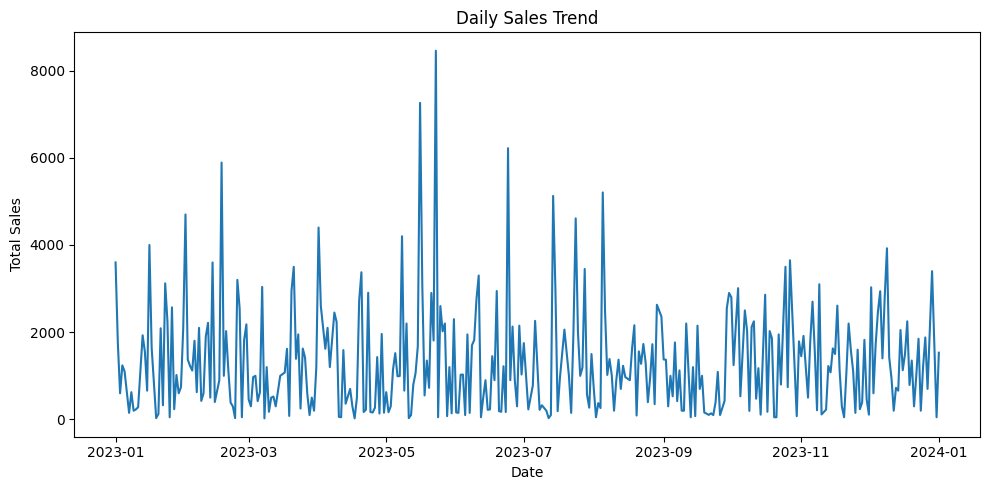

In [25]:
plt.figure(figsize=(10,5))
plt.plot(daily_sales["Date"], daily_sales["Total Amount"])
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend")
plt.tight_layout()
plt.show()

In [28]:
monthly_sales = (
    data
    .set_index("Date")
    .resample("m")["Total Amount"]
    .sum()
    .reset_index()
)

C:\Users\user\AppData\Local\Temp\ipykernel_11360\39034826.py:4: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("m")["Total Amount"]


In [29]:
print("\nMonthly Sales Head:")
print(monthly_sales.head())


Monthly Sales Head:
        Date  Total Amount
0 2023-01-31         35450
1 2023-02-28         44060
2 2023-03-31         28990
3 2023-04-30         33870
4 2023-05-31         53150


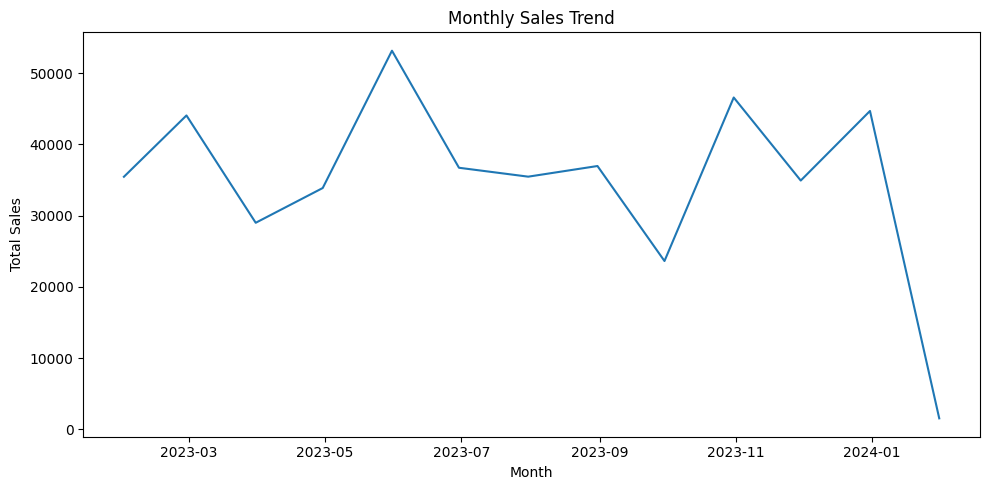

In [30]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Date"], monthly_sales["Total Amount"])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()